## Figures for GSOE expo poster at CCNY 
Feb 25, 2025

In [119]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random
import pandas as pd

plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

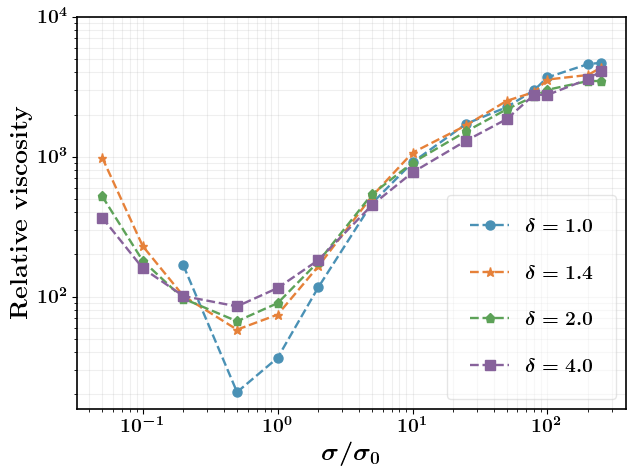

In [120]:
## flow curve (for new data)

## phi/phim = 0.97

npp = 1000
vr  = '0.5'
# below lists should be of the same length
phi = [0.765, 0.765, 0.77, 0.795]
ar  = [1.0, 1.4, 2.0, 4.0]

numRun = 1
line_markers = ['o', '*', 'p', 's']

stress = ['0.05','0.1','0.2', '0.5', '1', '2','5', '10', '25', '50', '80', '100', '200', '250']
stress1 = [float(s) for s in stress]

#linux
#topDir = '/home/rahul/mnt/sshfs_darwin/simulations/flow_curves'
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/"

#mac
topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'


off  = 100
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

for j, arj in enumerate(ar):
    visc     = [np.nan for _ in stress1]
    visc_std = [np.nan for _ in stress1]
    for s in range(len(stress)):
        workDir = f'{topDir}/stress_{stress[s]}r/NP_{npp}/phi_{phi[j]}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(workDir):
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file)  # Load all data into a 2D array
                if data_array.ndim != 1:
                    strain      = data_array[:, 1]  # Extract the second column (usecols=1)
                    data        = data_array[:, 3][off:]
                    visc[s]     = (np.mean(data) if len(data) > 0 else np.nan)
                    visc_std[s] = (np.std(data) if len(data) > 0 else np.nan)
                else:
                    visc[s]     = np.nan
                    visc_std[s] = np.nan
    
    visc_plot     = [i for i in visc if not np.isnan(i)]
    visc_err_plot = [i for i in visc_std if not np.isnan(i)]
    stress_plot   = [ stress1[i] for i in range(len(stress1)) if not np.isnan(visc[i])]
    plt.plot(stress_plot, visc_plot, linestyle='--', 
         marker=line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), 
         color=colors[j], linewidth=1.7, markersize=6.5)

ax = plt.gca()
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\textbf{Relative viscosity}$', fontsize=18, fontweight='bold', style='italic')
#plt.title(r'$\phi/\phi_{m} \approx 0.97$', fontsize=22, fontweight='bold',  pad=12)
plt.legend(loc='lower right', fontsize=14, labelspacing=1.5,borderpad=1.2,framealpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks([100, 1000, 10000], [r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=14, fontweight='bold')

plt.tight_layout()

if True:
    figFormat=".png"
    plt.savefig(fig_save_path+ "flowcurve"+figFormat, bbox_inches="tight",dpi=600, transparent=True)

plt.show()

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,,phi_m,C,R2,,,phi_m,C,R2,,
1.0,,,0.789,2.911,0.999,,,0.789,2.911,0.999,,,0.789,2.911,0.999,,
1.4,,,0.789,2.996,0.999,,,0.788,2.900,0.999,,,0.789,2.917,0.997,,
2.0,,,0.794,2.970,1.000,,,0.794,2.859,1.000,,,0.790,2.806,1.000,,
4.0,,,0.832,3.160,1.000,,,0.824,2.859,0.999,,,0.804,2.763,1.000,,


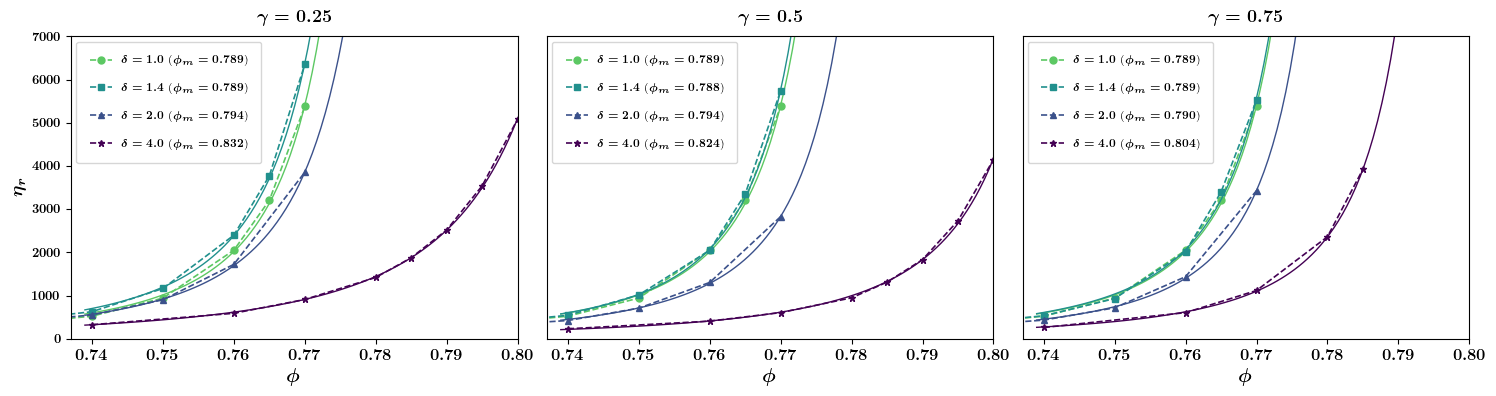

In [71]:
# maron pierce all plots
from IPython.display import HTML
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -(k*c))

display(Math(r"\eta_r = 1 * \left( 1 - \frac{\phi}{\phi_m} \right)^{-c*\phi_m}"))

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/new_data/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
phim    = []
cvals   = []
c_guess = 3
k_guess = [[.785,.785,.792,0.85],
           [.785,.785,.792,0.815],
           [.785,.785,.792,0.815]]
           # initial guess for max phi (phim)

# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, vri in enumerate(vrr):
    rerr    = [] # r2 error
    phims    = [] # max phi calculated from fitting
    c_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, _   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,p0=[c_guess, k_guess[i][j]])
        c_opt, k_opt = popt
        phims.append(k_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        c_list.append(c_opt)

        # plotting for model
        xx = np.linspace(0.739, .80, 100)
        yy = maronpierce(xx,c_opt,k_opt)
        ax[i].plot(xx, yy,color = cmap((j+1)/len(arr)))

        #coefficient of determinantion (r^2)
        r2 = True
        if r2:
            # calculating the r2 for each curve
            y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
            residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
            TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
            RSS = np.sum([i**2 for i in residuals])
            R_squared = 1 - (RSS / TSS)
            rerr.append(R_squared)
            #print("R-squared value:", R_squared)
            
    phim.append(phims)
    cvals.append(c_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    ax[i].set_xlim(.737, .80)
    ax[i].set_ylim(0, 7000)
    ax[i].set_xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    
    # table
    table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
    table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
    table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
    table.add_column(' ', [''] * len(arr))
    table.add_column(' ', [''] * len(arr))

    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=13,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=9)
ax[1].set_yticks([])
ax[2].set_yticks([])

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
fig.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ 'Maron-Pierce'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [72]:
print(pd.DataFrame(phim, index=vrr, columns=arr)), print(pd.DataFrame(cvals, index=vrr, columns=arr))

           1.0       1.4       2.0       4.0
0.25  0.788672  0.789439  0.793926  0.832410
0.5   0.788672  0.787789  0.793924  0.823920
0.75  0.788672  0.788531  0.790083  0.804429
           1.0       1.4       2.0       4.0
0.25  2.911419  2.995839  2.970178  3.159844
0.5   2.911419  2.899792  2.858918  2.858599
0.75  2.911419  2.916905  2.806146  2.762996


(None, None)

<IPython.core.display.Math object>

delta,,,phi_m,C,R2,,
1.0,,,0.789,2.911,0.999,,
1.4,,,0.788,2.900,0.999,,
2.0,,,0.794,2.859,1.000,,
4.0,,,0.824,2.859,0.999,,


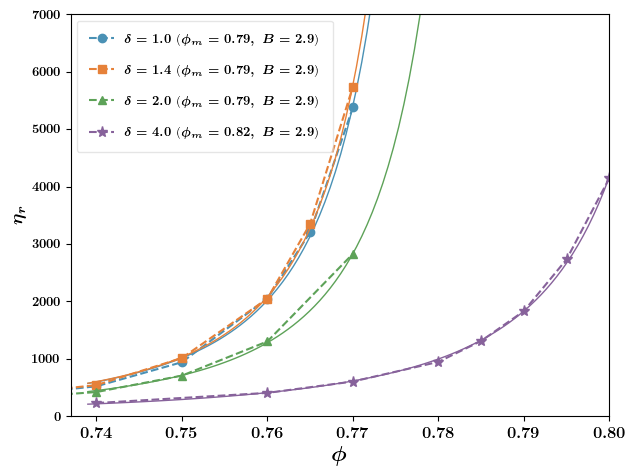

In [60]:
# maron pierce all plots
from IPython.display import HTML
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -(k*c))

display(Math(r"\eta_r = 1 * \left( 1 - \frac{\phi}{\phi_m} \right)^{-c*\phi_m}"))

line_markers = ['o', 's', '^', '*', 'p']
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = '0.5'
numRuns = 2
off     = 100
#phim    = []
#cvals   = []
c_guess = 3
k_guess = [.785,.785,.792,0.815]
           
# initial guess for max phi (phim)
# init table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

#fig, ax = plt.subplots(1, 3, figsize=(15, 4))
rerr    = [] # r2 error
phims   = [] # max phi calculated from fitting
c_list  = []

for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                #print(workDir)
                dataFile = glob.glob(workDir+"data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
        visc.append(np.mean(visc_list) if visc_list else np.nan) 

    visc_filtered     = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

    # curve fit
    popt, _   = curve_fit(maronpierce, phi_vals_filtered,visc_filtered,p0=[c_guess, k_guess[j]])
    c_opt, k_opt = popt
    phims.append(k_opt)
    msize = 8 if line_markers[j] == '*' else 6
    plt.plot(phi_vals_filtered, visc_filtered,linestyle='--',marker=line_markers[j], 
             label=r'$\delta = {:.1f}$ ($\phi_m = {:.2f}, \; B = {:.1f}$)'.format(arj,k_opt,c_opt), 
             color=colors[j],linewidth=1.5,markersize=msize)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.739, .80, 100)
    yy = maronpierce(xx,c_opt,k_opt)
    plt.plot(xx, yy,color=colors[j])

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [maronpierce(i, *popt) for i in phi_vals_filtered]
        residuals = [a - b for a, b in zip(visc_filtered, y_predicted)]
        TSS = np.sum((visc_filtered - np.mean(visc_filtered))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)


#ax[i].grid(which='Both', alpha=0.2)
plt.xlim(.737, .80)
plt.ylim(0, 7000)
plt.xlabel(r'$\mathbf{\phi}$', fontsize=16,fontstyle='italic')
plt.tick_params(axis='x', labelsize=12)
plt.legend(loc='upper left', fontsize=9,labelspacing=1.5,borderpad=1,framealpha=0.5)
#plt.title(fr'$\zeta = {vrr}0$', fontsize=13, pad=10)

# table
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phims])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
table.add_column(' ', [''] * len(arr))
table.add_column(' ', [''] * len(arr))

# plot parameters
plt.ylabel(r'$\mathbf{\eta}_{r}$', fontsize=13, fontstyle='italic')
plt.tick_params(axis='y', labelsize=9)

# table disp
html_table = f"""
<div style='display: flex; justify-content: center;'>
    {table.get_html_string()}
</div>
"""
display(HTML(html_table))
plt.tight_layout()

figsave=True
if figsave:
    figFormat=".png"
    plt.savefig(f"{fig_save_path}Maron-Pierce_vr_{vrr}{figFormat}", bbox_inches="tight", dpi=600, transparent=True)

plt.show()

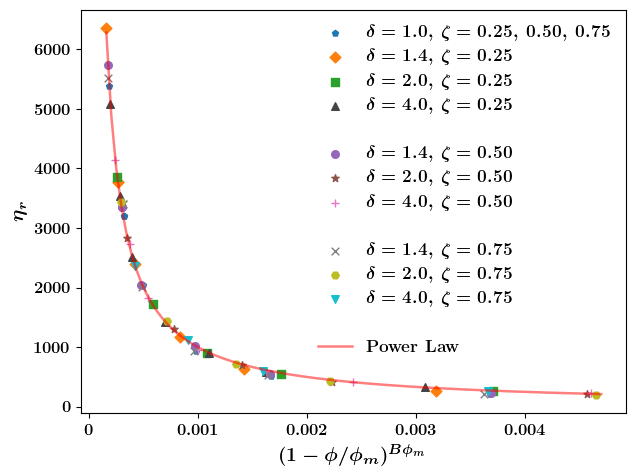

here B ~ 3


In [85]:
# To plot parameter vs phim all zeta values
# plotting functions

# run maron pierce for getting phim and cvals
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

#mac
topDir        = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.765, 0.79, 0.795, 0.8]
arr     = [1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100 #'#d62728'
colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
viscall = []
phimall = []
pcount  = 0

## plotting ar = 1 and vr = 0.25 case first
visc1      = []
viscerr1   = []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    viscerr_list = []
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) ** (phim[0][0]*cvals[0][0]) if phim[0][0] != 0 and 
                     (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc      = []
        viscerr   = []
        #phim_vals = [i/phim[][j] for i in phiv]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            viscerr_list = []
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** (cvals[l][j+1]*phim[l][j+1]) if phim[l][j+1] != 0 and (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        plt.scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=30, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
        
plt.xlabel(r'$(1-\phi/\phi_m)^{B\phi_m}$', fontsize=14,fontstyle='italic',labelpad=5)
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic',labelpad=5)

plt.xticks(np.arange(0, 0.005, 0.001), labels=["$0$", "$0.001$", "$0.002$", "$0.003$", "$0.004$"], fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# power law fit
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]

def power_law(x, a, b):
     return a * x**b

def linear(x, a, b):
    return a*x + b

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(1.6e-4, 47e-4, 100)
#plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)
plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$", linewidth=1.8, alpha=0.5)

plt.legend(loc='upper right', fontsize=12.5, frameon=False, labelspacing=.5)
plt.tight_layout()

if False:
    figFormat=".png"
    plt.savefig(fig_save_path+'visc_vs_phim_all'+figFormat, bbox_inches="tight",dpi=800)
plt.show()
print('here B ~ 3')

In [73]:
print(pd.DataFrame(phim, index=vrr, columns=arr)), print(pd.DataFrame(cvals, index=vrr, columns=arr))

           1.0       1.4       2.0       4.0
0.25  0.788672  0.789439  0.793926  0.832410
0.5   0.788672  0.787789  0.793924  0.823920
0.75  0.788672  0.788531  0.790083  0.804429
           1.0       1.4       2.0       4.0
0.25  2.911419  2.995839  2.970178  3.159844
0.5   2.911419  2.899792  2.858918  2.858599
0.75  2.911419  2.916905  2.806146  2.762996


(None, None)

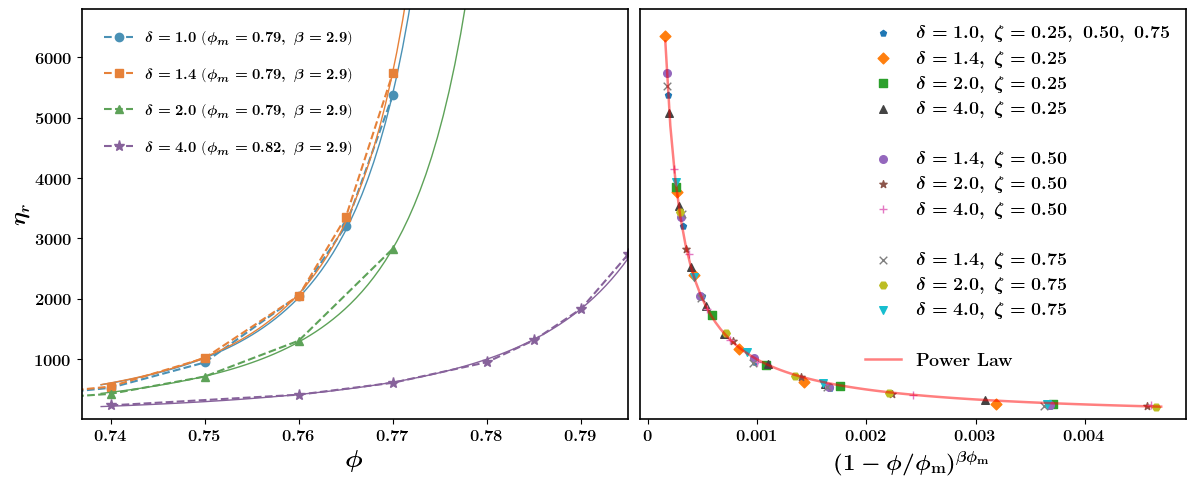

Completed: B ~ 3


In [172]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

# Suppress specific warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Define Maron-Pierce model
def maronpierce(x, c, k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Avoid negative/zero base
    return (base ** -(k * c))

# Power law fitting
def power_law(x, a, b):
    return a * x**b

# Plot styling
line_markers = ['o', 's', '^', '*', 'p']
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

# Mac paths
topDir = '/Volumes/rahul_2TB/high_bidispersity/new_data/'
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = '0.5'
numRuns = 2
off     = 100
c_guess = 3
k_guess = [0.785, 0.785, 0.792, 0.815]
fig, ax = plt.subplots(1, 2, figsize=(12, 4.9))
rerr, phims, c_list = [], [], []

for j, arj in enumerate(arr):
    visc = []
    
    for phi in phiv:
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                if len(data[off:, 3]) > off:
                    visc_list.append(np.mean(data[off:, 3]))
        
        visc.append(np.mean(visc_list) if visc_list else np.nan)

    # Remove NaN values for fitting
    visc_filtered = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

    # Curve fitting
    popt, _ = curve_fit(maronpierce, phi_vals_filtered, visc_filtered, p0=[c_guess, k_guess[j]])
    c_opt, k_opt = popt
    phims.append(k_opt)
    c_list.append(c_opt)

    # Plot raw data
    msize = 8 if line_markers[j] == '*' else 6
    ax[0].plot(phi_vals_filtered, visc_filtered, linestyle='--', marker=line_markers[j], 
               label=rf'$\delta = {arj:.1f}$ ($\phi_m = {k_opt:.2f}, \; \beta = {c_opt:.1f}$)', 
               color=colors[j], linewidth=1.5, markersize=msize)

    # Plot Maron-Pierce model fit
    xx = np.linspace(0.739, 0.80, 100)
    yy = maronpierce(xx, c_opt, k_opt)
    ax[0].plot(xx, yy, color=colors[j])



#########################################################################################################

arr = [1.4, 2.0, 4.0]
vrr = ['0.25', '0.5', '0.75']
viscall = []
phimall = []
pcount  = 0

colors  = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
    '#bcbd22', '#17becf', '#f6a821', '#f6d020',
    '#003366', '#cc6699'
]
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']

## plotting ar = 1 and vr = 0.25 case first
visc1, viscerr1     = [], []
for k, phi in enumerate(phiv):
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list, viscerr_list = [], []
    for run in range(numRuns):
        phim_vals = [(1 - (i / phim[0][0])) ** (phim[0][0]*cvals[0][0]) if phim[0][0] != 0 and (1 - (i / phim[0][0])) > 0 else float('nan') for i in phiv]
        workDir = f"{topDir}NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            #print(workDir)
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
            viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
    visc1.append(np.mean(visc_list) if visc_list else np.nan)
    viscerr1.append(np.mean(viscerr_list) if viscerr_list else np.nan)

visc_filtered      = [x for x in visc1 if not np.isnan(x)]
viscerr_filtered   = [x for x in viscerr1 if not np.isnan(x)]
phim_vals_filtered = [y for x, y in zip(visc1, phim_vals) if not np.isnan(x)]

viscall.append(visc_filtered)
phimall.append(phim_vals_filtered)

ax[1].scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=20, 
    label = fr'$\delta = 1.0,\; \zeta = 0.25,\; 0.50,\; 0.75$', color=colors[pcount])
pcount += 1

# plotting other cases        
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc, viscerr     = [], []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list, viscerr_list = [], []
            for run in range(numRuns):
                phim_vals = [(1 - (i/phim[l][j+1])) ** (cvals[l][j+1]*phim[l][j+1]) if phim[l][j+1] != 0 and 
                             (1 - (i / phim[l][j+1])) > 0 else float('nan') for i in phiv]
                workDir   = f"{topDir}NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc_list.append(np.mean(data[off:, 3])) if len(data[off:, 3]) > off else None
                    viscerr_list.append(np.std(data[off:, 3])) if len(data[off:, 3]) > off else None
            visc.append(np.mean(visc_list) if visc_list else np.nan)
            viscerr.append(np.mean(viscerr_list) if viscerr_list else np.nan)
        
        visc_filtered      = [x for x in visc if not np.isnan(x)]
        viscerr_filtered   = [x for x in viscerr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(visc, phim_vals) if not np.isnan(x)]

        viscall.append(visc_filtered)
        phimall.append(phim_vals_filtered)
        ax[1].scatter(phim_vals_filtered, visc_filtered, marker=marker_shape[pcount], s=30, 
            label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$', color=colors[pcount])
        pcount += 1
        
    plt.plot([], [], ' ', label=" ") 
    
viscFlat = [i for sublist in viscall for i in sublist]
phimFlat = [i for sublist in phimall for i in sublist]

params, covariance = curve_fit(power_law, phimFlat, viscFlat)
a, b = params
xlin = np.linspace(1.6e-4, 47e-4, 100)
#plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$: $y = {a:.2f} \cdot x^{{{b:.2f}}}$", linewidth=1.5, alpha=0.4)
plt.plot(xlin, power_law(xlin, *params), color='r', label=fr"$\textbf{{Power Law}}$", linewidth=1.8, alpha=0.5)

# Set axis limits and labels
ax[0].set_xlim(0.737, 0.795)
ax[0].set_xlabel(r'$\mathbf{\phi}$', fontsize=18, fontstyle='italic', fontweight='bold')
ax[0].set_ylabel(r'$\mathbf{\eta}_{r}$', fontsize=16, fontstyle='italic', fontweight='bold')
ax[0].tick_params(axis='x', labelsize=12, labelcolor='black')
ax[0].tick_params(axis='y', labelsize=12, labelcolor='black')
ax[0].legend(loc='upper left', fontsize=10.5, labelspacing=1.5, borderpad=1, frameon=False)

# Axis styling
ax[1].set_xlabel(r'$\mathbf{(1-\phi/\phi_m)^{\beta\phi_m}}$', fontsize=16, fontstyle='italic', fontweight='bold', labelpad=5)
ax[0].set_ylim(1, 6800)
ax[1].set_ylim(1, 6800)  # Changed y-limit
ax[1].set_yticks([])  # Remove y-ticks
ax[1].set_ylabel("")  # Remove y-label
ax[1].set_xticks(np.arange(0, 0.005, 0.001))
ax[1].set_xticklabels(["$0$", "$0.001$", "$0.002$", "$0.003$", "$0.004$"], fontsize=12)
ax[1].legend(loc='upper right', fontsize=13, frameon=False, labelspacing=0.5)

for a in ax:  # Loop over subplots
    a.spines['top'].set_linewidth(1.2)
    a.spines['right'].set_linewidth(1.2)
    a.spines['left'].set_linewidth(1.2)
    a.spines['bottom'].set_linewidth(1.2)

# Adjust layout and display plot
fig.tight_layout()



if True:
    figFormat=".png"
    plt.savefig(fig_save_path+'kreiger_all_phim'+figFormat, bbox_inches="tight",dpi=800)
plt.show()

print("Completed: B ~ 3")

In [135]:
## angular contacts

import os
import matplotlib                   # type: ignore
import numpy             as     np  # type: ignore
import matplotlib.pyplot as     plt # type: ignore
import random

def updateContAngle(theta, contList):
    '''
    This function to calulated the complementary contact angle and append to 
    relevant list (contList)

    Inputs:
    theta    - primary contact angle. Calculated by arctan2(nz,nx)
    contList - list where the angle appends. This list contains all the contact angle for one case, all runs
    '''
    contList.append(theta)
    if theta < 0:
        contList.append(np.pi - abs(theta))
    else:
        contList.append(theta - np.pi)

def particleSizeList(randomSeedFile, sizeRatio, npp = 1000):
    '''
    This function reads the random seed file and creates
    a list of particle sizes. The list index is the particle index.

    Inputs:
    randomSeedFile - location for the random seed file. It contains the particle index and sizes
    sizeRatio      - delta or ar for the case
    npp            - system size
    '''

    if sizeRatio == 1:
        # Painting particles randomly in two colours for monodisperse case.
        particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
        random.shuffle(particleSize)
    else:
        particleSize = np.loadtxt(randomSeedFile, usecols = 3) # reading only column 3 which has particle size
        randomSeedFile.close()
    return particleSize

def interactionsList(interactionFile):
    '''
    This function reads the interaction file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: interactionFile - the location of the interaction data file
    '''

    hashCounter = 0
    temp        = []
    contactList = [] # list with interaction parameters for each element at each timestep

    fileLines = interactionFile.readlines()[27:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                contactList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    interactionFile.close()
    return contactList 

<Figure size 640x480 with 0 Axes>

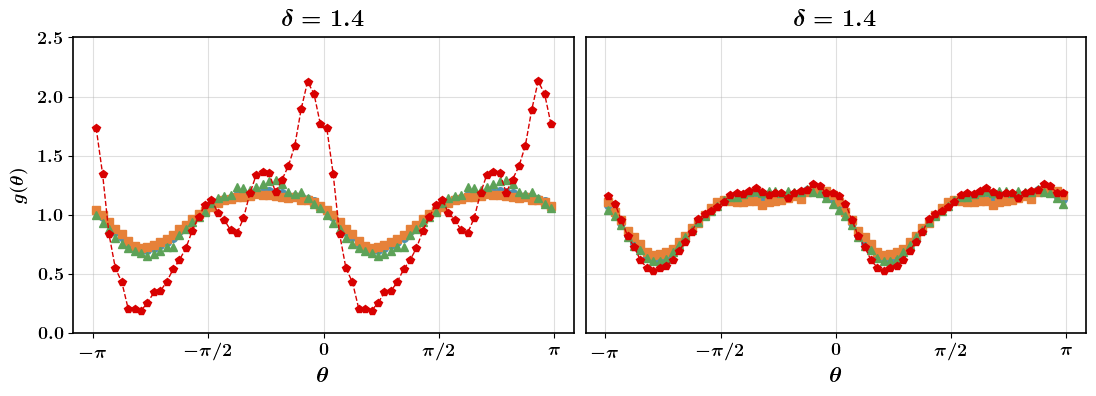

In [139]:
plt.clf()
ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'
colors      = ['#4a91b5', '#e68139', '#5da258', '#D80000']
linestyles  = ['None', 'None', 'None', '--']

# Mac
topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data/"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

# both lists below should be of same length
ar  = ['4.0', '1.4']
phi = ['0.795', '0.765']
vr  = '0.5'
numRuns  = 2

npp = 1000 # no. of particles
off = 100  # steady state cut off

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (11, 4))

for ii in range(len(ar)):
    sizePair              = ['Total', 'SS', 'SL', 'LL']
    line_markers          = ['o', 's', '^', 'p']
    contactAngleAllRuns   = [[] for _ in range(len(sizePair))] # empty nested list for all four runs 

    dataname = f'{topDir}NP_{npp}/phi_{phi[ii]}/ar_{ar[ii]}/Vr_{vr}'
    if os.path.exists(dataname):
        for l in range(numRuns):
            ranFile      = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')
            particleSize = particleSizeList(ranFile, sizeRatio = float(ar[ii])) 

            interFile   = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
            contactList = interactionsList(interFile) 

            contactAngleTotal = [[] for _ in range(len(sizePair))]
            for sampleList in contactList[off:]:
                timeStepContactAngle = [[] for _ in range(len(sizePair))] # all contact angles at each timestep
                for i in range (sampleList.shape[0]):
                    particleSize1 = particleSize[int(sampleList[i, 0])]
                    particleSize2 = particleSize[int(sampleList[i, 1])]
                    contState     = int(sampleList[i, 10]) # Contact state
                    thetaRad      = np.arctan2(sampleList[i,4],sampleList[i,2])

                    if contState == 2:
                        thetaRad = np.arctan2(sampleList[i,4], sampleList[i,2]) # contact angle = tan^-1(nz/nx) ; nz, nx: unit vector in z and x
                        updateContAngle(thetaRad, timeStepContactAngle[0])

                        # Small-Small
                        if (particleSize1 == particleSize2 == 1):
                            updateContAngle(thetaRad, timeStepContactAngle[1])

                        # Small-Large
                        elif (particleSize1 != particleSize2):
                            updateContAngle(thetaRad, timeStepContactAngle[2])

                        # Large-Large
                        elif (particleSize1 == particleSize2 > 1):
                            updateContAngle(thetaRad, timeStepContactAngle[3])

                for m in range(len(contactAngleTotal)):
                    contactAngleTotal[m].append(timeStepContactAngle[m]) # nested list of all contact angles

            for n in range(len(contactAngleAllRuns)):
                contactAngleList = [i for sub in contactAngleTotal[n] for i in sub]
                contactAngleAllRuns[n].append(contactAngleList)

    # Loop for plotting histogram for each size pair 
    for im in range(len(contactAngleAllRuns)):
        allContactAngles  = [i for sub in contactAngleAllRuns[im] for i in sub]
        counts, bin_edges = np.histogram(allContactAngles, bins = 72, density = True)
        bin_centers       = (bin_edges[:-1] + bin_edges[1:]) / 2
        countsAvg         = np.mean(counts)
        axs[ii].plot(bin_centers, counts/countsAvg, linestyle = linestyles[im], 
                 marker=line_markers[im], markersize = 5.5, label=fr'\textbf{{{sizePair[ii]}}}', color = colors[im])

    xticks       = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
    xtick_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
    axs[ii].set_xticks(xticks, xtick_labels, fontsize = 13)
    axs[ii].set_xlabel(r'$\theta$',  fontsize = 16)
    axs[0].set_ylabel(r'$Z/\bar{Z}$', fontsize = 16)
    axs[ii].set_title(fr'$\mathbf{{\delta = {arr}}}$', fontsize = 17, pad=8)

    axs[ii].grid(True, alpha=0.4, axis='both', which='both')
    axs[0].set_ylabel(r'$g(\theta)$', fontsize = 13, labelpad=7) # comment this for 2.0 and 4.0
    axs[0].tick_params(axis='y', labelsize=13)
    axs[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    axs[ii].set_ylim(0, 2.5)
    
    for ax in axs.flat:
        ax.spines['top'].set_linewidth(1.2)
        ax.spines['right'].set_linewidth(1.2)
        ax.spines['left'].set_linewidth(1.2)
        ax.spines['bottom'].set_linewidth(1.2)

if False:
    figFormat     = ".png"
    fig.savefig(fig_save_path + '/angularContacts_ar_1.4_4.0'  + figFormat, bbox_inches = "tight", dpi = 500, transparent = True)
plt.show()

<Figure size 640x480 with 0 Axes>

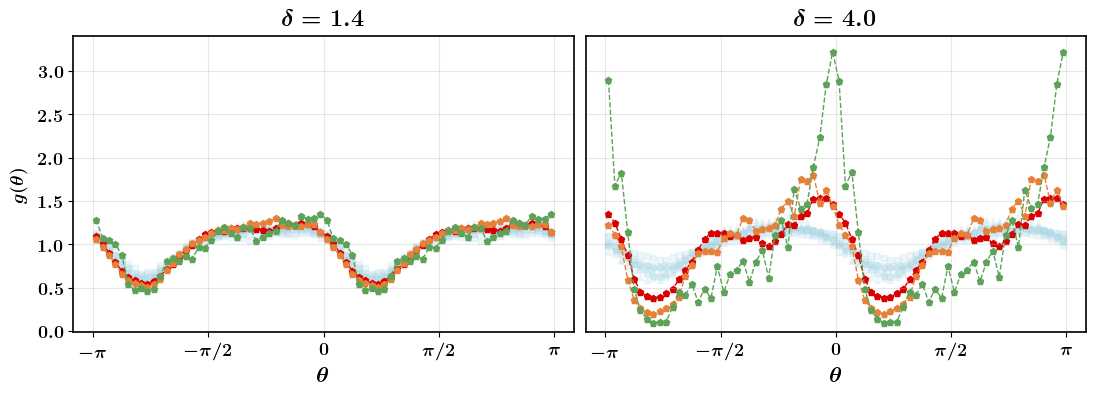

In [149]:
plt.clf()
ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'
# colors = [
#     ['#6a9fb5', '#c68c5a', '#7daa7a', '#D80000'],  
#     ['#6a9fb5', '#7daa7a', '#D80000', '#e68139'],  
#     ['#c68c5a', '#D80000', '#6a9fb5', '#5da258']   
# ]

colors = [
    ['#ADD8E6', '#ADD8E6', '#ADD8E6', '#D80000'],  # red last
    ['#ADD8E6', '#ADD8E6', '#ADD8E6', '#e68139'],  # orange last
    ['#ADD8E6', '#ADD8E6', '#ADD8E6', '#5da258']   # green last
]

linestyles  = ['None', 'None', 'None', '--']

# Mac
topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data/"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

ar  = ['1.4'  , '4.0']
#phi = ['0.795', '0.765']

## phi vals for etar = 3500
phival = { ('0.25', '1.4'): '0.76', ('0.5', '1.4'): '0.76', ('0.75', '1.4'): '0.77',
           ('0.25', '4.0'): '0.80', ('0.5', '4.0'): '0.80', ('0.75', '4.0'): '0.78' }

vr = ['0.25', '0.5', '0.75']
numRuns  = 2

npp = 1000 # no. of particles
off = 100  # steady state cut off

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (11, 4))

for ij in range(len(vr)):
    for ii in range(len(ar)):
        phii = phival[(vr[ij], ar[ii])]
        sizePair              = ['Total', 'SS', 'SL', 'LL']
        line_markers          = ['o', 's', '^', 'p']
        contactAngleAllRuns   = [[] for _ in range(len(sizePair))] # empty nested list for all four runs 

        dataname = f'{topDir}NP_{npp}/phi_{phii}/ar_{ar[ii]}/Vr_{vr[ij]}'
        if os.path.exists(dataname):
            for l in range(numRuns):
                ranFile      = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')
                particleSize = particleSizeList(ranFile, sizeRatio = float(ar[ii])) 

                interFile   = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
                contactList = interactionsList(interFile) 

                contactAngleTotal = [[] for _ in range(len(sizePair))]
                for sampleList in contactList[off:]:
                    timeStepContactAngle = [[] for _ in range(len(sizePair))] # all contact angles at each timestep
                    for i in range (sampleList.shape[0]):
                        particleSize1 = particleSize[int(sampleList[i, 0])]
                        particleSize2 = particleSize[int(sampleList[i, 1])]
                        contState     = int(sampleList[i, 10]) # Contact state
                        thetaRad      = np.arctan2(sampleList[i,4],sampleList[i,2])

                        if contState == 2:
                            thetaRad = np.arctan2(sampleList[i,4], sampleList[i,2]) # contact angle = tan^-1(nz/nx) ; nz, nx: unit vector in z and x
                            updateContAngle(thetaRad, timeStepContactAngle[0])

                            # Small-Small
                            if (particleSize1 == particleSize2 == 1):
                                updateContAngle(thetaRad, timeStepContactAngle[1])

                            # Small-Large
                            elif (particleSize1 != particleSize2):
                                updateContAngle(thetaRad, timeStepContactAngle[2])

                            # Large-Large
                            elif (particleSize1 == particleSize2 > 1):
                                updateContAngle(thetaRad, timeStepContactAngle[3])

                    for m in range(len(contactAngleTotal)):
                        contactAngleTotal[m].append(timeStepContactAngle[m]) # nested list of all contact angles

                for n in range(len(contactAngleAllRuns)):
                    contactAngleList = [i for sub in contactAngleTotal[n] for i in sub]
                    contactAngleAllRuns[n].append(contactAngleList)

        # Loop for plotting histogram for each size pair 
        for im in range(len(contactAngleAllRuns)):
            allContactAngles  = [i for sub in contactAngleAllRuns[im] for i in sub]
            counts, bin_edges = np.histogram(allContactAngles, bins = 72, density = True)
            bin_centers       = (bin_edges[:-1] + bin_edges[1:]) / 2
            countsAvg         = np.mean(counts)
            zorder_mapping = {
            '#D80000': 1,  # Red
            '#e68139': 2,  # Orange
            '#5da258': 3,  # Green
            '#ADD8E6': 0   # Light Gray (should be in the background)
            }

            plot_color  = colors[ij][im]
            zorder_value = zorder_mapping.get(plot_color, 1)
            marker_alpha = 0.2 if plot_color == '#ADD8E6' else 1.0  # Reduce opacity for gray
            markersize_value = 4.5 if arj == 4.0 else 1
            axs[ii].plot( 
                bin_centers, counts / countsAvg, linestyle=linestyles[im], 
                marker=line_markers[im], markersize=markersize_value, alpha=marker_alpha,  # Apply dynamic alpha & size
                label=fr'\textbf{{{sizePair[ii]}}}', color=plot_color, 
                zorder=zorder_value)

        xticks       = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
        xtick_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
        axs[ii].set_xticks(xticks, xtick_labels, fontsize = 13)
        axs[ii].set_xlabel(r'$\theta$',  fontsize = 16)
        axs[0].set_ylabel(r'$Z/\bar{Z}$', fontsize = 16)
        axs[ii].set_title(fr'$\mathbf{{\delta = {ar[ii]}}}$', fontsize = 17, pad=8)

        axs[ii].grid(True, alpha=0.3, axis='both', which='both')
        axs[0].set_ylabel(r'$g(\theta)$', fontsize = 13, labelpad=7) # comment this for 2.0 and 4.0
        axs[0].tick_params(axis='y', labelsize=13)
        axs[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
        axs[ii].set_ylim(-0.01, 3.4)

        for ax in axs.flat:
            ax.spines['top'].set_linewidth(1.2)
            ax.spines['right'].set_linewidth(1.2)
            ax.spines['left'].set_linewidth(1.2)
            ax.spines['bottom'].set_linewidth(1.2)

#fig.suptitle(fr'$\mathbf{{\zeta = 0.50, \; }$', fontsize = 17, pad=8)

if True:
    figFormat     = ".png"
    fig.savefig(fig_save_path + 'angularContacts_ar_1.4_4.0_all_vr'  + figFormat, bbox_inches = "tight", dpi = 800, transparent = True)
plt.show()

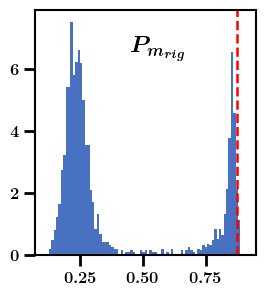

In [169]:
# Frig histogram - solo plots

npp  = 1000
phii = 0.77
vr   = '0.25'
ar   = '1.4'
numRuns  = 1
off      = 50

# Mac
topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data/"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

#linux
#topDir        = '/home/rahul/mnt/sshfs_darwin/simulations/'
#fig_save_path = '/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/new_data/'

plt.figure(figsize=(2.7, 3.0)) # 3 and 3.1

frigList = []
for run in range(numRuns):
    workDir = f"{topDir}NP_{npp}/phi_{phii}/ar_{ar}/Vr_{vr}/run_{run+1}/"
    if os.path.exists(workDir + "F_rig.txt"):
        dataFile = workDir + "F_rig.txt"
        data     = np.loadtxt(dataFile)
        frigList.append(data[off:])
        
    dataFile1 = glob.glob(workDir+"data_*.dat")[0]
    data1     = np.loadtxt(dataFile1)
    srate     = data1[off:, 2]
    jammed_srate = [index for index, value in enumerate(srate) if value < 0]
    
if len(frigList) > 0:
    frig = [item/npp for sublist in frigList for item in sublist]
    counts, bin_edges = np.histogram(frig, bins=80, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    plt.xlim([0.07, 0.95])
    plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0],color=(0.1, 0.3, 0.7, 0.8))
    #plt.title(fr'$\phi = {phii}$', fontsize=15, pad=8)
    #plt.xlabel(r'$f_{rig}$', fontsize=15)
    
    ax = plt.gca()
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(axis='both', which='major', width=2.0, size=8, labelsize=12)
    #ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    for index, value in enumerate(jammed_srate):
        bar_x = list(frigList)[0][value]/npp  # x position of the bar
        plt.axvline(x=bar_x*1.02, color='red', linestyle='--', linewidth=1.8)

    #plt.text(0.45, 9, r'$P_{m_{rig}}$', fontsize=17)
    plt.text(0.45, 6.5, r'$P_{m_{rig}}$', fontsize=17)
    
tick_values = [.25, .50, .75]  # Replace with the desired x-values for ticks
plt.xticks(tick_values)
plt.tight_layout()

if True:
    figFormat=".png"
    plt.savefig(f"{fig_save_path}rig_criticality_{vr}_{phii}_{ar}{figFormat}", bbox_inches="tight", dpi=600, transparent=True)

plt.show()

In [150]:
# Below are the functions used in the above histogram functions. Esessentially to shorten it.
import os
import matplotlib                   # type: ignore
import numpy             as     np  # type: ignore
import matplotlib.pyplot as     plt # type: ignore
import random

def updateContForce(theta, binCentersList, forceList, forceVal):
    '''
    This function is used to calulated the complementary contact angle and 
    sum-append the force for that contact to relevant list

    Inputs:
    theta          - primary contact angle. Calculated by arctan2(nz,nx)
    binCentersList - centers of bins
    forceList      - list of total forces for each bin. The force appends here at the relevant bin
    forceVal       - the value of norm of the normal contact force to be sum-appended to 'forceList'
    '''
    
    #bin_Center = int(np.floor(len(binCentersList)/2))
    bin_Center = len(binCentersList) // 2
    bin_Index = np.argmin(np.abs(binCentersList - theta))
    forceList[bin_Index] += forceVal
    
    if bin_Index != bin_Center:
        bin_Index2 = (bin_Center + 1) + bin_Index if bin_Index < bin_Center else bin_Index - (bin_Center + 1)
        forceList[bin_Index2] += forceVal

def particleSizeList(randomSeedFile, sizeRatio, npp = 1000):
    '''
    This function reads the random seed file and creates
    a list of particle sizes. The list index is the particle index.

    Inputs:
    randomSeedFile - location for the random seed file. It contains the particle index and sizes
    sizeRatio      - delta or ar for the case
    npp            - system size
    '''

    if sizeRatio == 1:
        # Painting particles randomly in two colours for monodisperse case.
        particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
        random.shuffle(particleSize)
    else:
        particleSize = np.loadtxt(randomSeedFile, usecols = 3) # reading only column 3 which has particle size
        randomSeedFile.close()
    return particleSize

def interactionsList(interactionFile):
    '''
    This function reads the interaction file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: interactionFile - the location of the interaction data file
    '''

    hashCounter = 0
    temp        = []
    contactList = [] # list with interaction parameters for each element at each timestep

    fileLines = interactionFile.readlines()[27:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                contactList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    interactionFile.close()
    return contactList

#def angularForcesAllSizePair(phii, arr, figsave = False):

<Figure size 640x480 with 0 Axes>

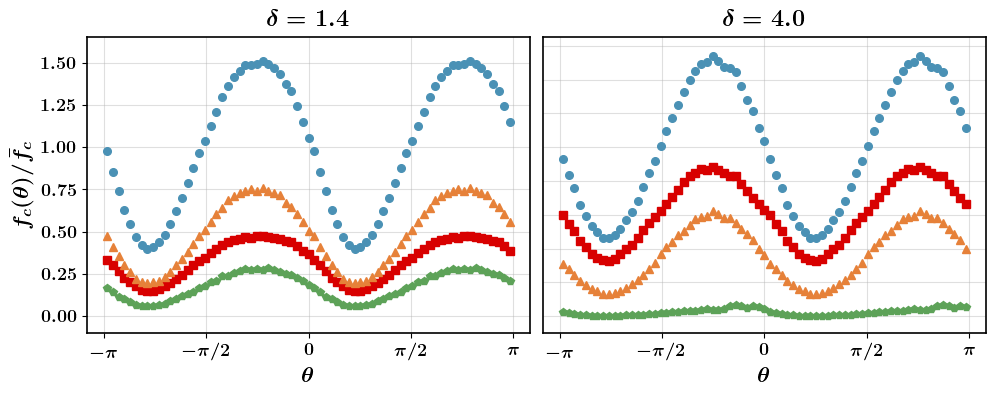

In [152]:
plt.clf()
#cmap = matplotlib.colormaps['viridis_r'] #color scheme

sizePair     = ['Total', 'SS', 'SL', 'LL']
line_markers = ['o', 's', '^', 'p']
#colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
colors = ['#4a91b5', '#D80000','#e68139', '#5da258']
linestyles  = ['None', 'None', 'None', '--']
    
# Mac
topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data/"
fig_save_path = '/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/conferences/GSOE_poster/figures/'

npp = 1000 # no. of particles
off = 100  # steady state cut off

angleBins  = np.linspace(-np.pi, np.pi,72)
binCenters = (angleBins[:-1] + angleBins[1:])/2

ar_vals  = ['1.4', '4.0']
phi_vals = ['0.75', '0.78']
numRuns  = 2

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

for ii, arr in enumerate(ar_vals):
    phii = phi_vals[ii]
    
    forceBin_Sum = [[0]*len(binCenters) for _ in range(len(sizePair))] # empty nested list for all four runs 
    contCount    = [0]*len(sizePair)
    

    #colors = ['#4a91b5', '#D80000', '#5da258', '#87629b', '#1b9e77']
    #linestyles = ['None', '--', 'None', 'None']
    
    dataname     = topDir + 'NP_' + str(npp) + '/phi_' + phii + '/ar_' + str(arr) + '/Vr_0.5'
    if os.path.exists(dataname):
        for l in range (numRuns):
            # List of particle size. List index is particle index.
            ranFile      = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')
            particleSize = particleSizeList(ranFile, sizeRatio = arr) 

            # Nested list of all interaction params, each list is one timestep.
            interFile   = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
            contactList = interactionsList(interFile) 
           
            for sampleList in contactList[off:]:
                for i in range (sampleList.shape[0]):
                    particleSize1 = particleSize[int(sampleList[i,0])]
                    particleSize2 = particleSize[int(sampleList[i,1])]
                    contState     = int(sampleList[i,10]) # Contact state
                    contForce     = sampleList[i,11] # Norm of normal contact force
                    thetaRad      = np.arctan2(sampleList[i,4], sampleList[i,2])

                    if contState == 2:
                        # For all particles.
                        updateContForce(thetaRad, binCenters, forceBin_Sum[0], contForce)
                        contCount[0] += 2
                        
                        # Small-Small.
                        if (particleSize1 == particleSize2 == 1):
                            updateContForce(thetaRad, binCenters, forceBin_Sum[1], contForce)
                            contCount[1] += 2

                        # Small-Large
                        elif (particleSize1 != particleSize2):
                            updateContForce(thetaRad, binCenters, forceBin_Sum[2], contForce)
                            contCount[2] += 2

                        # Large-Large
                        elif (particleSize1 == particleSize2 > 1):
                            updateContForce(thetaRad, binCenters, forceBin_Sum[3], contForce)
                            contCount[3] += 2

    #force_flatten = [gg for sublist in forceBin_Sum for gg in sublist]
    forceAvg = np.mean(forceBin_Sum[0])
    # Loop for plotting each size pair 
    for im in range(len(forceBin_Sum)):
    #for ii in range(1):
        #forceAvg     = np.mean(forceBin_Sum[ii])
        forceDensity = [i/forceAvg for i in forceBin_Sum[im]]
        forceDensity[35] *= 2
        axs[ii].plot(binCenters, forceDensity, linestyle = linestyles[im], 
                 marker=line_markers[im], markersize = 5.5, 
                 label=fr'\textbf{{{sizePair[im]}}}', color = colors[im])

    
    #plt.legend(fontsize = 14, labelspacing = 1, borderpad = 1, markerscale=1.2)
    xticks       = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
    xtick_labels = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
    axs[ii].set_xticks(xticks, xtick_labels, fontsize = 13)
    axs[ii].set_xlabel(r'$\theta$',  fontsize = 16)
    #axs[0].set_ylabel(r'$Z/\bar{Z}$', fontsize = 16)
    axs[ii].set_title(fr'$\mathbf{{\delta = {arr}}}$', fontsize = 17, pad=8)

    axs[ii].grid(True, alpha=0.4, axis='both', which='both')
    axs[0].set_ylabel(r'$g(\theta)$', fontsize = 13, labelpad=7) # comment this for 2.0 and 4.0
    axs[0].tick_params(axis='y', labelsize=13)
    axs[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    
    axs[0].set_ylabel(r'$f_c(\theta)/\bar{f_c}$', fontsize = 16, labelpad=5)
    axs[ii].set_ylim(-0.1+0, 1.65)
    
    for ax in axs.flat:
        ax.spines['top'].set_linewidth(1.2)
        ax.spines['right'].set_linewidth(1.2)
        ax.spines['left'].set_linewidth(1.2)
        ax.spines['bottom'].set_linewidth(1.2)
        
if False:
    figFormat     = ".png"
    fig.savefig(fig_save_path + '/angularForces_ar_1.4_4.0'  + figFormat, bbox_inches = "tight", dpi = 500, transparent = True)

plt.show()